# import packages

In [52]:
import io
import ast
import json
import requests

import supervision as sv

from PIL import Image
from rfdetr import RFDETRBase
from IPython.display import display


# Download artifacts

(1) Download coco classnames for annotation purpose
(2) Using the `url` download the dog-2.jpeg image for testing the model

In [53]:
!wget https://gist.githubusercontent.com/AruniRC/7b3dadd004da04c80198557db5da4bda/raw/2f10965ace1e36c4a9dca76ead19b744f5eb7e88/ms_coco_classnames.txt

--2025-03-21 21:37:02--  https://gist.githubusercontent.com/AruniRC/7b3dadd004da04c80198557db5da4bda/raw/2f10965ace1e36c4a9dca76ead19b744f5eb7e88/ms_coco_classnames.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1354 (1.3K) [text/plain]
Saving to: ‘ms_coco_classnames.txt.3’

ms_coco_classnames. 100%[===================>]   1.32K  --.-KB/s    in 0s      

2025-03-21 21:37:03 (92.2 MB/s) - ‘ms_coco_classnames.txt.3’ saved [1354/1354]



In [69]:
with open("ms_coco_classnames.txt") as fp:
    id2label = ast.literal_eval(''.join(fp.readlines()))
    classnames = list(id2label.values())

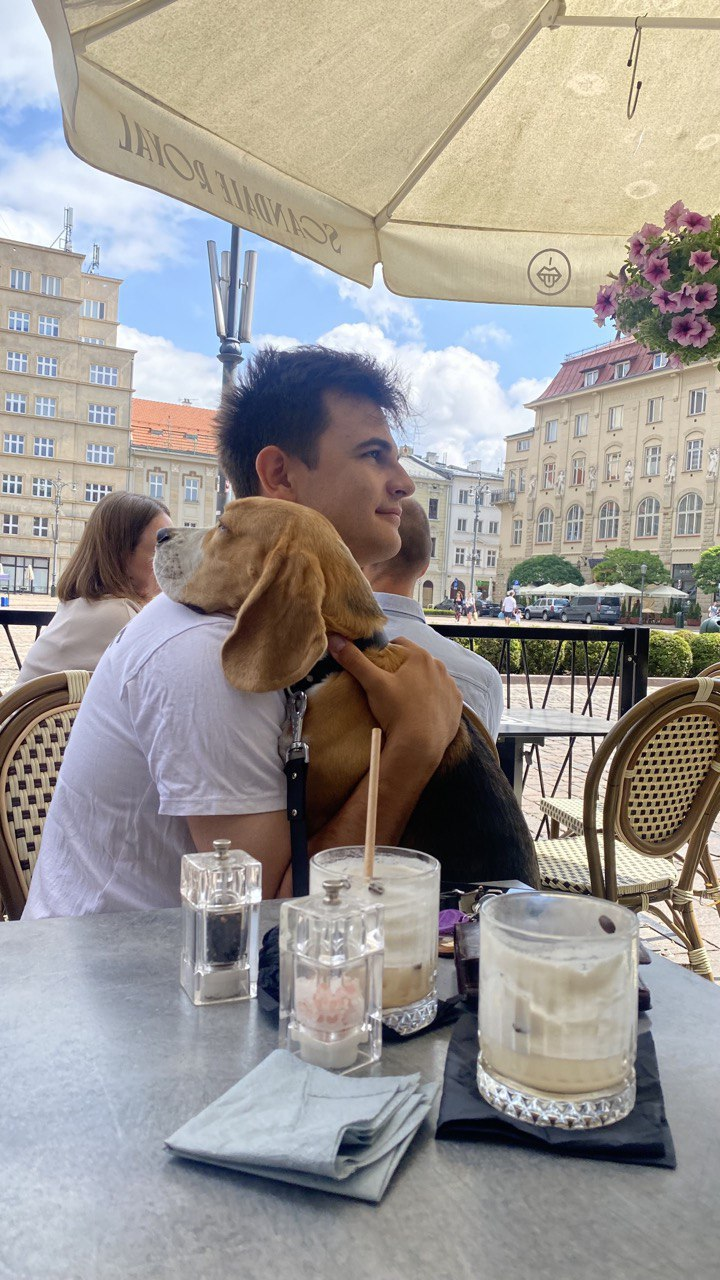

In [55]:
url = "https://media.roboflow.com/notebooks/examples/dog-2.jpeg"
image = Image.open(io.BytesIO(requests.get(url).content))
display(image)


# Model setting

In [67]:
# Setting model using RFDETRBase model
model = RFDETRBase()

# Computing detections
detections = model.predict(image, threshold=0.5)
print("Detection complete")

Loading pretrain weights
Detection complete


In [68]:
_detections_str_ = '''
Detections(
       xyxy=array([
              [ 4.7468695e+02,  8.8643768e+02,  6.4293872e+02,  1.1312466e+03],
              [ 5.3255792e+02,  6.7710522e+02,  7.2011432e+02,  9.7971588e+02],
              [-1.7207444e-01,  6.6930548e+02,  9.1252937e+01,  9.2039771e+02],
              [ 3.4034485e+01,  1.3199329e+00,  7.1967383e+02,  3.0917462e+02],
              [ 5.2420559e+00,  4.8984387e+02,  1.7512822e+02,  6.9744336e+02],
              [ 8.4298611e-01,  8.8308838e+02,  7.1901422e+02,  1.2675408e+03],
              [ 3.0931412e+02,  8.4456934e+02,  4.4062384e+02,  1.0375363e+03],
              [ 3.6757019e+02,  4.9779980e+02,  5.0416458e+02,  7.4338110e+02],
              [ 2.7880499e+02,  8.8141266e+02,  3.8484650e+02,  1.0761182e+03],
              [ 2.0542503e+01,  3.4470422e+02,  4.7535867e+02,  9.2176385e+02],
              [ 5.9302448e+02,  2.0016974e+02,  7.1982147e+02,  3.6422205e+02],
              [ 5.0043030e+02,  5.8624792e+02,  5.2159570e+02,  6.2023645e+02]], dtype=float32), 
       confidence=array([0.9430283 , 0.9345317 , 0.9173504 , 0.86408776, 0.86162704,0.8502467 , 0.8253163 , 0.71534634, 0.7085917 , 0.6390011 ,0.6229387 , 0.61249876], dtype=float32), 
       mask=None, 
       class_id=array([47, 62, 62, 28,  1, 67, 47,  1, 47,  1, 64,  1]), 
       tracker_id=None, 
       data={}, 
       metadata={})'
'''

# Plotting detections

In [87]:
detection

(array([ 474.68695,  886.4377 ,  642.9387 , 1131.2466 ], dtype=float32),
 None,
 np.float32(0.9430283),
 np.int64(47),
 None,
 {})

In [ ]:
:
    pass

47

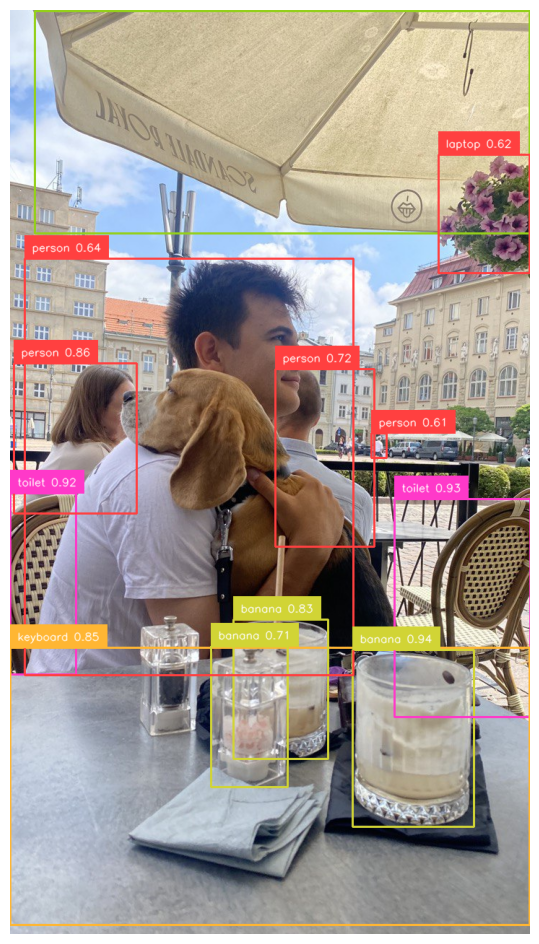

In [ ]:
annotated_image = image.copy()

# id2label has been defined by the coco classnames downloaded above.
labels = [
    f"{id2label[pred]} {confidence:0.2f}" 
    for _, _, confidence, pred, _, _ in detections
]

annotated_image = sv.BoxAnnotator().annotate(annotated_image, detections)
annotated_image = sv.LabelAnnotator().annotate(annotated_image, detections, labels)

sv.plot_image(annotated_image)